In [1]:
# Import libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import pandas as pd

In [2]:
# Load data

df1 = pd.read_csv(r'customer_transactions_2009.csv',encoding='unicode_escape')
df2 = pd.read_csv(r'customer_transactions_2010.csv', encoding='unicode_escape')


df = pd.concat([df1, df2], ignore_index=True)

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/09 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/09 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/09 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/09 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/09 7:45,1.25,13085.0,United Kingdom


In [4]:
# Rename columns

df.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer_ID', 'Country']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/09 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/09 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/09 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/09 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/09 7:45,1.25,13085.0,United Kingdom


In [5]:
# Check data types and descriptive statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer_ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None
           Quantity         Price    Customer_ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   1

In [24]:
# Convert InvoiceDate to datetime format 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%y %H:%M')

# Calculate 'Total Sales' and convert to thousands for readability
df['Total Sales'] = (df['Quantity'] * df['Price'] / 1000).round(2)

# Check data types after appending
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1067371 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer_ID  1067371 non-null  int64         
 7   Country      1067371 non-null  object        
 8   Total Sales  1067371 non-null  float64       
 9   Month-Year   1067371 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(2), object(4), period[M](1)
memory usage: 81.4+ MB


In [25]:
df.describe()

,Quantity,InvoiceDate,Price,Customer_ID,Total Sales
count,1.067371e+06,1067371,1.067371e+06,1.067371e+06,1.067371e+06
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,1.183547e+04,1.793049e-02
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,-1.000000e+00,-1.684700e+02
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,1.253000e+04,0.000000e+00
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,1.452500e+04,1.000000e-02
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,1.637200e+04,2.000000e-02
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,1.828700e+04,1.684700e+02
std,1.727058e+02,NaN,1.235531e+02,6.597337e+03,2.924523e-01


In [26]:
# Check for missing values
print(df.isnull().sum())

# Customer_ID should be numeric and not object
df['Customer_ID'] = df['Customer_ID'].fillna(-1).astype(int)

# Fill missing values for no descriptions
df['Description'] = df['Description'].fillna('No Description')


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer_ID    0
Country        0
Total Sales    0
Month-Year     0
dtype: int64


In [27]:

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer_ID    0
Country        0
Total Sales    0
Month-Year     0
dtype: int64

## Basic Exploratory Data Analysis

### Monthly Sales Trends

Earliest Invoice Date: 2009-12-01 07:45:00
Latest Invoice Date: 2011-12-09 12:50:00


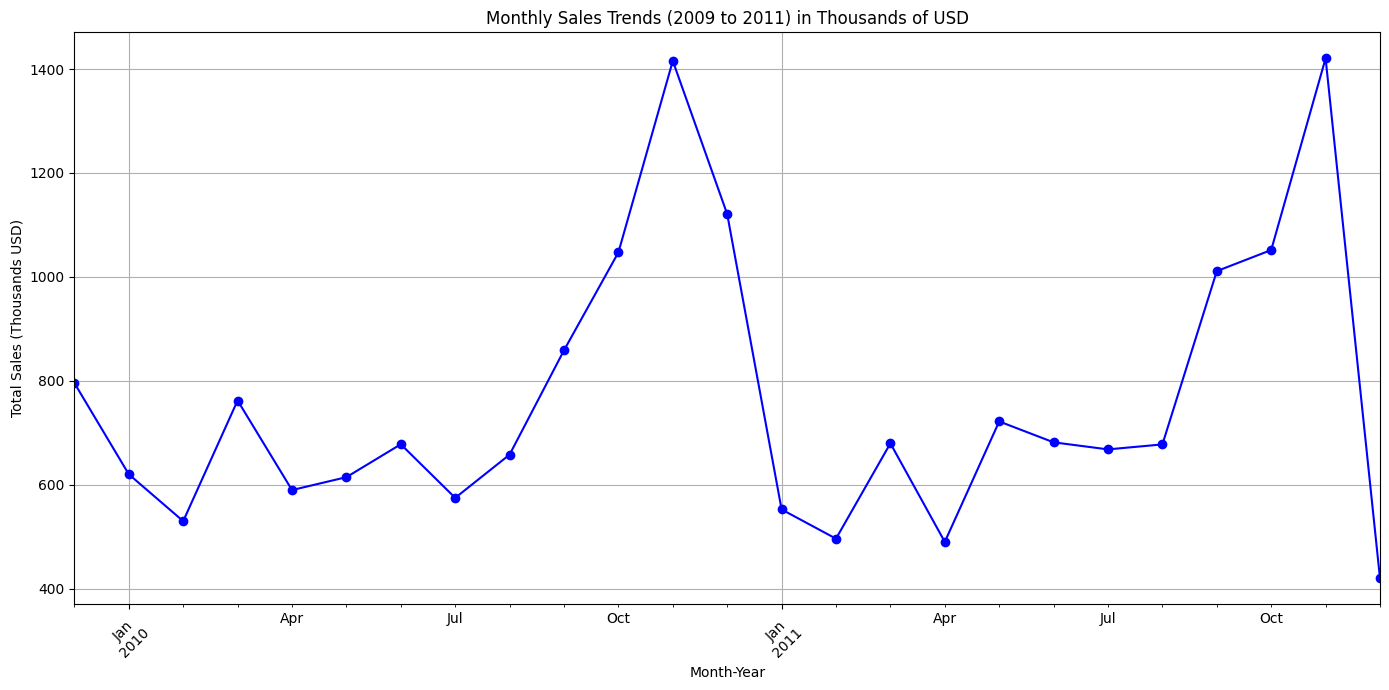

In [28]:
# Verify the range of dates in the dataset
print("Earliest Invoice Date:", df['InvoiceDate'].min())
print("Latest Invoice Date:", df['InvoiceDate'].max())

# Create a new column for 'Month-Year' and group data by this column
df['Month-Year'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Total Sales'].sum()

# Plotting the monthly sales
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Monthly Sales Trends (2009 to 2011) in Thousands of USD')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (Thousands USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Country Wise Sales

In [29]:
# Group by 'Country' and sum 'Total Sales', then reset index to use 'Country' as a column
country_sales = df.groupby('Country')['Total Sales'].sum().reset_index()

# Sorting the DataFrame by 'Total Sales'
country_sales = country_sales.sort_values(by='Total Sales', ascending=False)

# Getting the top 5 and bottom 5 countries
top_countries = country_sales.head(5)
bottom_countries = country_sales.tail(5)

# Display the tables using Plotly for a more interactive visualization
fig_top = px.bar(top_countries, x='Country', y='Total Sales',
                 title="Top Performing Countries", text='Total Sales')
fig_bottom = px.bar(bottom_countries, x='Country', y='Total Sales',
                    title="Underperforming Countries", text='Total Sales')

# Show the plots
fig_top.show()
fig_bottom.show()

## Product Performance based exploration

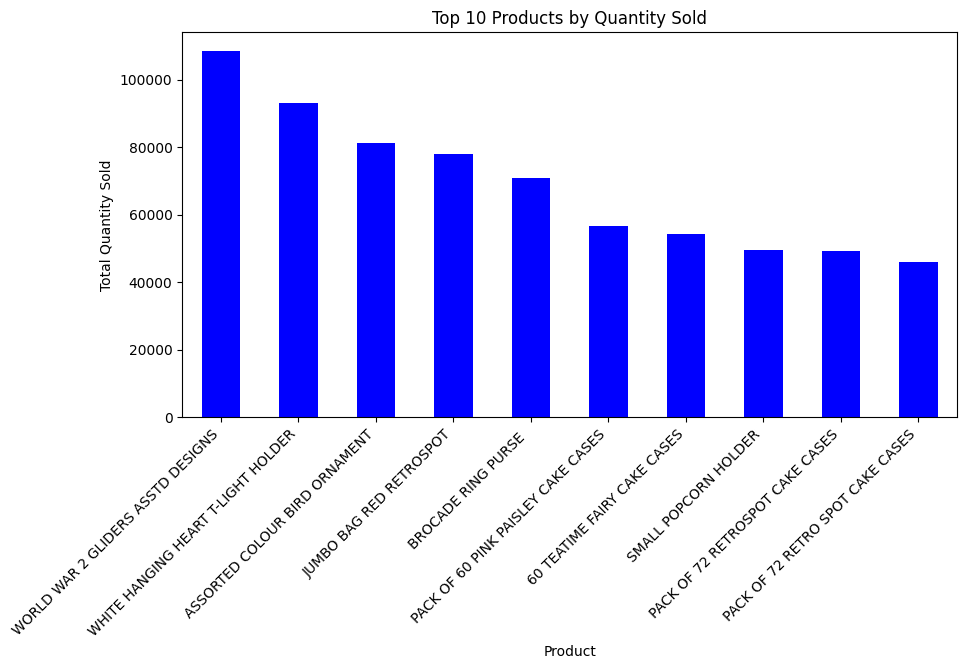

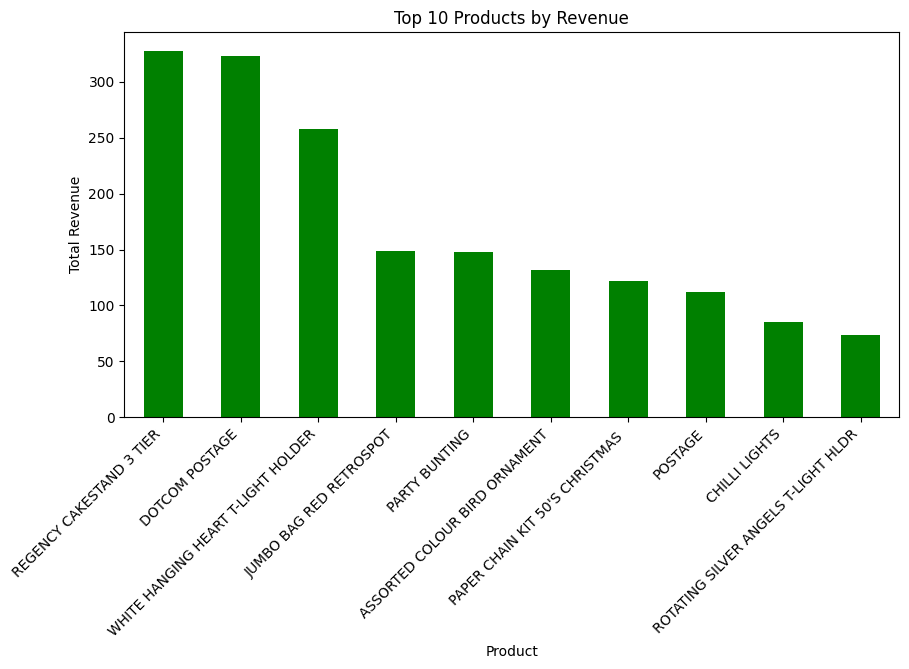

In [21]:
# Top-Selling Products by Quantity
top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top-Selling Products by Revenue
top_products_revenue = df.groupby('Description')['Total Sales'].sum().sort_values(ascending=False).head(10)

# Underperforming Products by Quantity
bottom_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)

# Underperforming Products by Revenue
bottom_products_revenue = df.groupby('Description')['Total Sales'].sum().sort_values(ascending=True).head(10)

# Plotting Top 10 Products by Quantity
plt.figure(figsize=(10, 5))
top_products_quantity.plot(kind='bar', color='blue')
plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting Top 10 Products by Revenue
plt.figure(figsize=(10, 5))
top_products_revenue.plot(kind='bar', color='green')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.show()

## Seasonal Trends for top selling products

Top Performing Products by Revenue:
 Description
REGENCY CAKESTAND 3 TIER               327.81365
DOTCOM POSTAGE                         322.64747
WHITE HANGING HEART T-LIGHT HOLDER     257.53390
JUMBO BAG RED RETROSPOT                148.80064
PARTY BUNTING                          147.94850
ASSORTED COLOUR BIRD ORNAMENT          131.41385
PAPER CHAIN KIT 50'S CHRISTMAS         121.66214
POSTAGE                                112.34100
CHILLI LIGHTS                           84.85416
ROTATING SILVER ANGELS T-LIGHT HLDR     73.81472
Name: Total Sales, dtype: float64

Sample Product for Seasonal Trend Analysis: REGENCY CAKESTAND 3 TIER


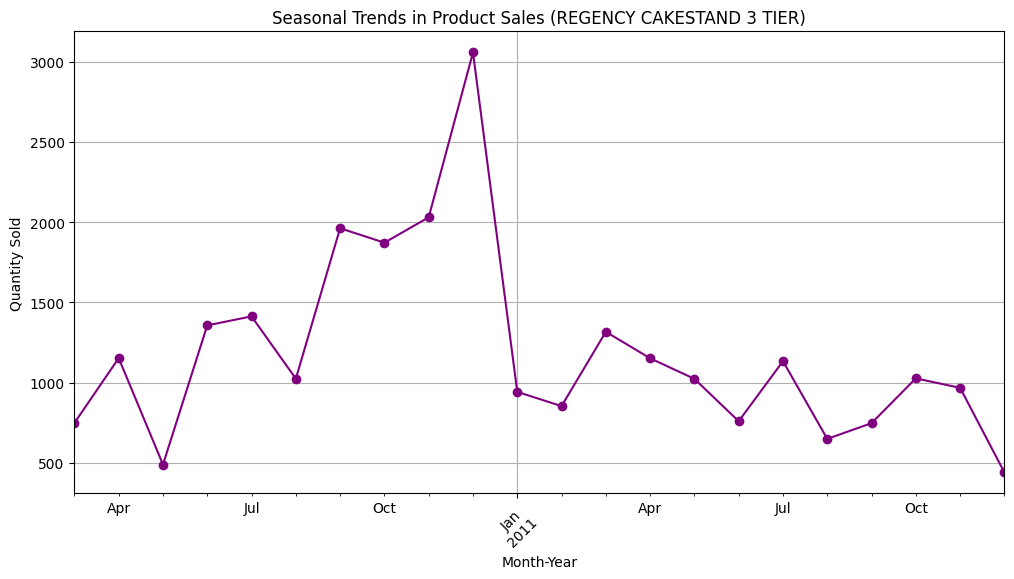

In [23]:
# Top-Selling Products by Revenue
top_products_revenue = df.groupby('Description')['Total Sales'].sum().sort_values(ascending=False).head(10)

# Pick a sample product from the top-performing products
sample_product = top_products_revenue.idxmax()

# Display the top products and the selected sample product
# print("Top Performing Products by Revenue:\n", top_products_revenue)
# print("\nSample Product for Seasonal Trend Analysis:", sample_product)


# Grouping data by Product and Month-Year for Quantity Sold
seasonal_trends = df[df['Description'] == sample_product].groupby('Month-Year')['Quantity'].sum()

# Plotting Seasonal Trends for the sample product
plt.figure(figsize=(12, 6))
seasonal_trends.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title(f'Seasonal Trends in Product Sales ({sample_product})')
plt.ylabel('Quantity Sold')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Customer Purchase Patterns

Given We have discounts, platform fees and other fees for these entries.

Nulls in the field Customer ID are taken as '-1' for this analysis. 

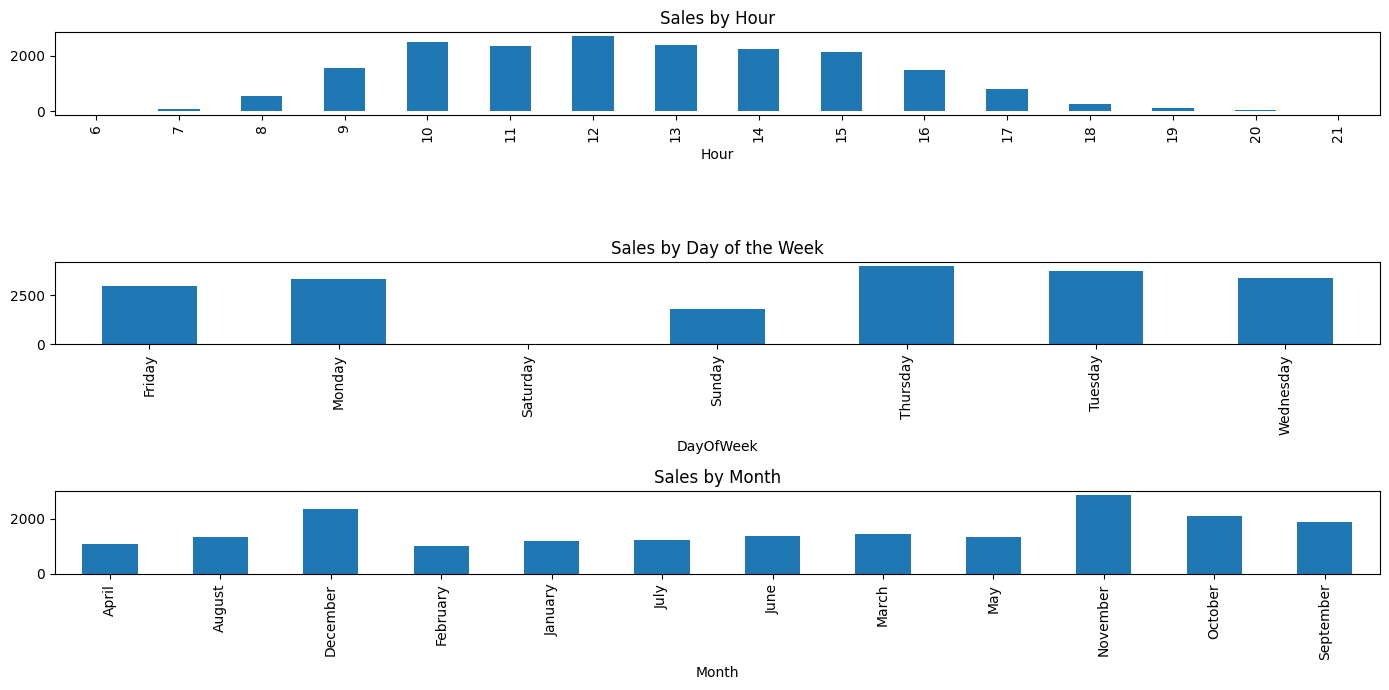

In [30]:
# Assuming 'df' is your DataFrame and contains 'InvoiceDate'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure InvoiceDate is a datetime object
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()

# Aggregate sales by hour, day of the week, and month to see when purchases peak
sales_by_hour = df.groupby('Hour')['Total Sales'].sum()
sales_by_day = df.groupby('DayOfWeek')['Total Sales'].sum()
sales_by_month = df.groupby('Month')['Total Sales'].sum()

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
sales_by_hour.plot(kind='bar')
plt.title('Sales by Hour')

plt.subplot(3, 1, 2)
sales_by_day.plot(kind='bar')
plt.title('Sales by Day of the Week')

plt.subplot(3, 1, 3)
sales_by_month.plot(kind='bar')
plt.title('Sales by Month')
plt.tight_layout()
plt.show()

Top Loyal Customers by Revenue:
             InvoiceNo  Total Sales
Customer_ID                        
-1                8752      2457.32
 18102             153       598.36
 14646             164       522.19
 14156             202       298.07
 14911             510       279.14


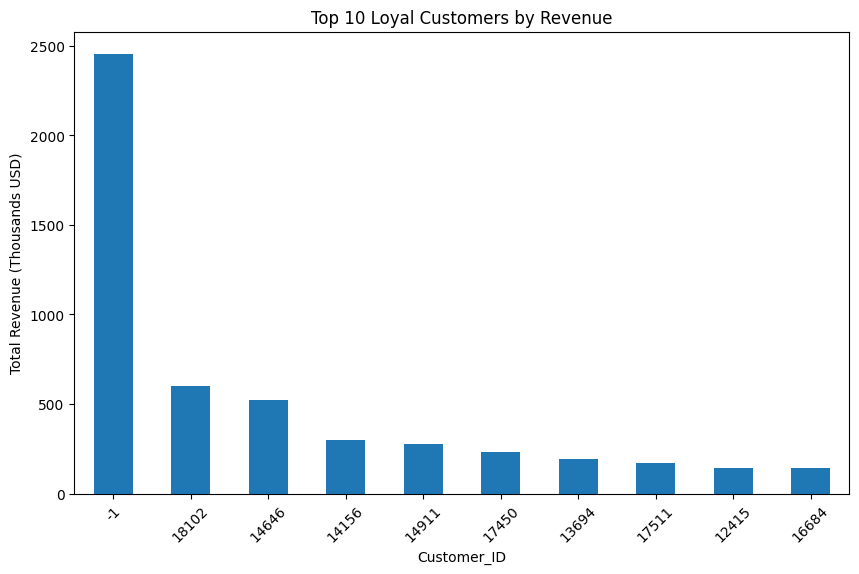

In [36]:
# Calculate the frequency and total revenue by customer
customer_stats = df.groupby('Customer_ID').agg({
    'InvoiceNo': 'nunique',  # Number of unique purchases (frequency)
    'Total Sales': 'sum'   # Total revenue from each customer
})

# Identifying loyal customers: define 'loyal' as those in the top 20% frequency
loyal_threshold = customer_stats['InvoiceNo'].quantile(0.80)
loyal_customers = customer_stats[customer_stats['InvoiceNo'] >= loyal_threshold]

# Sort loyal customers by total revenue to see top contributors
loyal_customers = loyal_customers.sort_values(by='Total Sales', ascending=False)

# Displaying top loyal customers by revenue
print("Top Loyal Customers by Revenue:")
print(loyal_customers.head())

# Visualization: Bar plot of top 10 loyal customers by revenue
top_loyal_customers = loyal_customers.head(10)
plt.figure(figsize=(10, 6))
top_loyal_customers['Total Sales'].plot(kind='bar')
plt.title('Top 10 Loyal Customers by Revenue')
plt.xlabel('Customer_ID')
plt.ylabel('Total Revenue (Thousands USD)')
plt.xticks(rotation=45)
plt.show()

Top Loyal Customers by Revenue:
             InvoiceNo  Total Sales
Customer_ID                        
18102              153       598.36
14646              164       522.19
14156              202       298.07
14911              510       279.14
17450               61       233.58


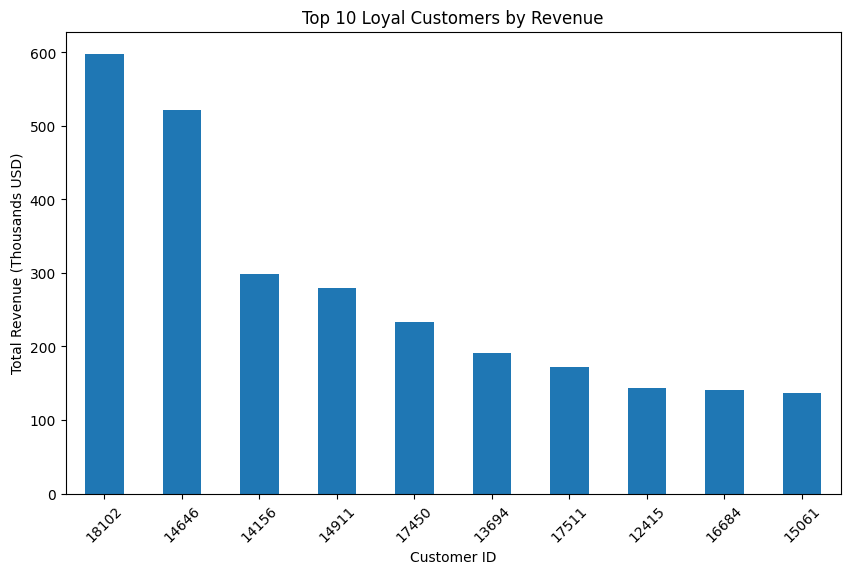

In [38]:
# Exclude customers with 'Customer ID' as -1
df_filtered = df[df['Customer_ID'] != -1]

# Calculate the frequency and total revenue by customer
customer_stats = df_filtered.groupby('Customer_ID').agg({
    'InvoiceNo': 'nunique',  
    'Total Sales': 'sum'   
})

# Identifying loyal customers: define 'loyal' as those in the top 20% frequency
loyal_threshold = customer_stats['InvoiceNo'].quantile(0.80)
loyal_customers = customer_stats[customer_stats['InvoiceNo'] >= loyal_threshold]

# Sort loyal customers by total revenue to see top contributors
loyal_customers = loyal_customers.sort_values(by='Total Sales', ascending=False)

# Displaying top loyal customers by revenue
print("Top Loyal Customers by Revenue:")
print(loyal_customers.head())

# Visualization: Bar plot of top 10 loyal customers by revenue
top_loyal_customers = loyal_customers.head(10)
plt.figure(figsize=(10, 6))
top_loyal_customers['Total Sales'].plot(kind='bar')
plt.title('Top 10 Loyal Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue (Thousands USD)')
plt.xticks(rotation=45)
plt.show()